In [34]:
import pandas as pd

import plotly.express as px

In [35]:
data = pd.read_csv("avocado.csv")
data['destination_state'] = data['destination'].str.split(':').str[0].str.strip()
# data['date'] = pd.to_datetime(data['date'])

In [36]:
avg_price_by_day_mexico = (
    data
    .groupby('date')
    .agg(
        avg_price=('avg_price', 'mean'),
        avg_min_price=('min_price', 'mean'),
        avg_max_price=('max_price', 'mean')
    )
    .reset_index()
)

In [37]:
avg_price_by_day_mexico

,date,avg_price,avg_min_price,avg_max_price
0,2020-01-02,36.512000,35.204500,38.307500
1,2020-01-03,37.054545,35.435000,38.775227
2,2020-01-06,37.167674,35.835581,38.854419
3,2020-01-07,36.082045,34.555455,37.889545
4,2020-01-08,36.106047,34.699302,37.545814
...,...,...,...,...
1510,2026-01-05,42.929722,41.036944,45.446667
1511,2026-01-06,43.445135,41.552432,45.858108
1512,2026-01-07,42.940789,41.084737,45.309211
1513,2026-01-08,43.059211,40.926842,45.388158


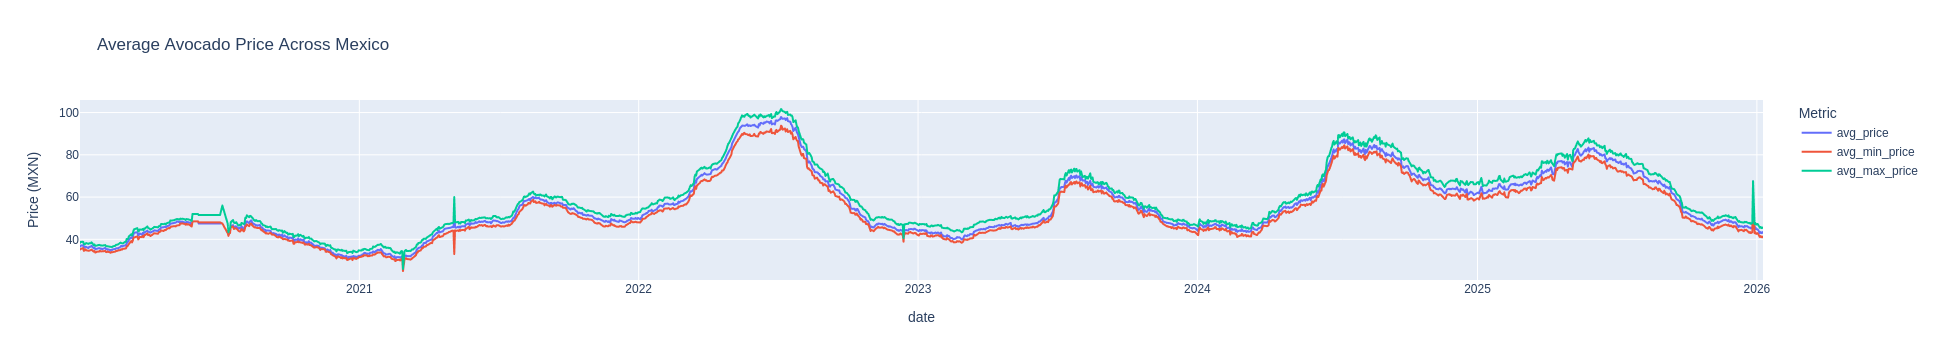

In [38]:
fig = px.line(
    avg_price_by_day_mexico,
    x="date",
    y=["avg_price", "avg_min_price", "avg_max_price"],
    title="Average Avocado Price Across Mexico",
    labels={
        "value": "Price (MXN)",
        "variable": "Metric"
    }
)
fig.show()

In [39]:
avg_price_by_day_origin = (
    data
    .groupby(['date', 'origin'])
    .agg(
        avg_price=('avg_price', 'mean'),
        avg_min_price=('min_price', 'mean'),
        avg_max_price=('max_price', 'mean')
    )
    .reset_index()
)

avg_price_by_day_origin.head()

,date,origin,avg_price,avg_min_price,avg_max_price
0,2020-01-02,Distrito Federal,32.345000,32.345000,33.61500
1,2020-01-02,Jalisco,39.111667,38.778333,42.00000
2,2020-01-02,Michoacán,35.139167,33.937083,37.05375
3,2020-01-02,México,35.000000,35.000000,35.00000
4,2020-01-02,Nayarit,49.500000,48.500000,50.50000


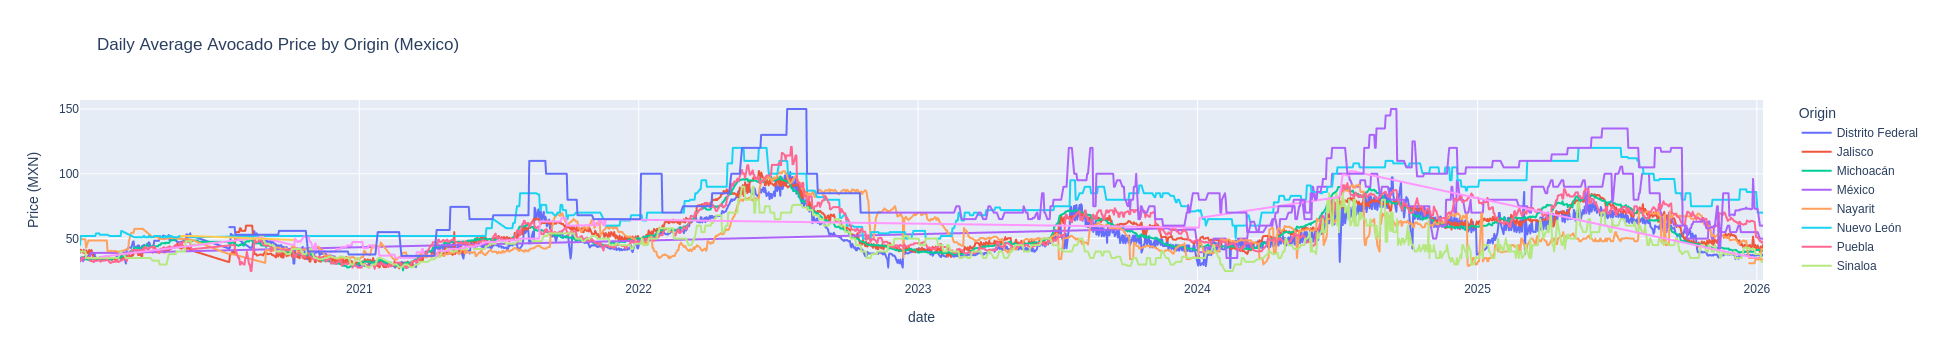

In [40]:
fig = px.line(
    avg_price_by_day_origin,
    x="date",
    y="avg_price",
    color="origin",
    title="Daily Average Avocado Price by Origin (Mexico)",
    labels={
        "avg_price": "Price (MXN)",
        "origin": "Origin"
    }
)

fig.show()

In [42]:
avg_price_by_day_destination_state = (
    data
    .groupby(['date', 'destination_state'])
    .agg(
        avg_price=('avg_price', 'mean'),
        avg_min_price=('min_price', 'mean'),
        avg_max_price=('max_price', 'mean')
    )
    .reset_index()
)
_state_state_state_state_state_state_state
avg_price_by_day_destination_state.head()

,date,destination_state,avg_price,avg_min_price,avg_max_price
0,2020-01-02,Aguascalientes,27.00,25.00,29.00
1,2020-01-02,Baja California,83.33,83.33,83.33
2,2020-01-02,Baja California Sur,78.00,78.00,90.00
3,2020-01-02,Campeche,27.69,27.69,29.23
4,2020-01-02,Chiapas,24.00,24.00,25.00


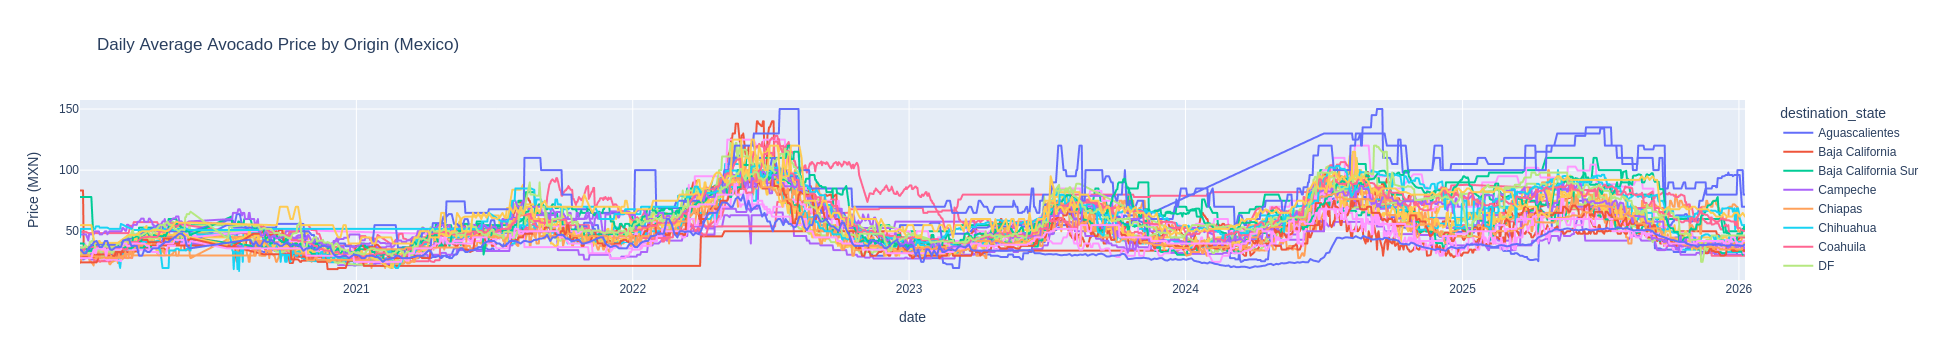

In [44]:
fig = px.line(
    avg_price_by_day_destination_state,
    x="date",
    y="avg_price",
    color="destination_state",
    title="Daily Average Avocado Price by Origin (Mexico)",
    labels={
        "avg_price": "Price (MXN)",
        "origin": "Origin"
    }
)

fig.show()

In [49]:
avg_price_state_year = (
    data
    .groupby(['date', 'destination_state'])
    .agg(avg_price=('avg_price', 'mean'))
    .reset_index()
)

avg_price_state_year = avg_price_state_year.sort_values(
    ['destination_state', 'date']
)

avg_price_state_year['price_change'] = (
    avg_price_state_year
    .groupby('destination_state')['avg_price']
    .diff()
)

avg_price_state_year['pct_change'] = (
    avg_price_state_year
    .groupby('destination_state')['avg_price']
    .pct_change() * 100
)


cheapest_states = (
    avg_price_state_year
    .sort_values(['date', 'avg_price'])
    .groupby('date')
    .head(5)
    .reset_index(drop=True)
)

most_expensive_states = (
    avg_price_state_year
    .sort_values(['date', 'avg_price'], ascending=[True, False])
    .groupby('date')
    .head(5)
    .reset_index(drop=True)
)

In [52]:
cheapest_states.head(5)

,date,destination_state,avg_price,price_change,pct_change
0,2020-01-02,Chiapas,24.00,NaN,NaN
1,2020-01-02,Hidalgo,24.58,NaN,NaN
2,2020-01-02,Aguascalientes,27.00,NaN,NaN
3,2020-01-02,Campeche,27.69,NaN,NaN
4,2020-01-02,Zacatecas,28.00,NaN,NaN


In [54]:
most_expensive_states.head(7)

,date,destination_state,avg_price,price_change,pct_change
0,2020-01-02,Baja California,83.33,NaN,NaN
1,2020-01-02,Baja California Sur,78.00,NaN,NaN
2,2020-01-02,Nayarit,49.50,NaN,NaN
3,2020-01-02,Sonora,47.35,NaN,NaN
4,2020-01-02,Tamaulipas,45.00,NaN,NaN
5,2020-01-03,Baja California,83.33,0.0,0.0
6,2020-01-03,Baja California Sur,78.00,0.0,0.0
